In [12]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import sklearn.metrics as metrics

In [13]:
df = pd.read_csv("Weather_Data.csv")
df.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2/1/2008,19.5,22.4,15.6,6.2,0.0,W,41,S,SSW,...,92,84,1017.6,1017.4,8,8,20.7,20.9,Yes,Yes
1,2/2/2008,19.5,25.6,6.0,3.4,2.7,W,41,W,E,...,83,73,1017.9,1016.4,7,7,22.4,24.8,Yes,Yes
2,2/3/2008,21.6,24.5,6.6,2.4,0.1,W,41,ESE,ESE,...,88,86,1016.7,1015.6,7,8,23.5,23.0,Yes,Yes
3,2/4/2008,20.2,22.8,18.8,2.2,0.0,W,41,NNE,E,...,83,90,1014.2,1011.8,8,8,21.4,20.9,Yes,Yes
4,2/5/2008,19.7,25.7,77.4,4.8,0.0,W,41,NNE,W,...,88,74,1008.3,1004.8,8,8,22.5,25.5,Yes,Yes


In [14]:
df_sydney_processed = pd.get_dummies(data=df, columns=['RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])

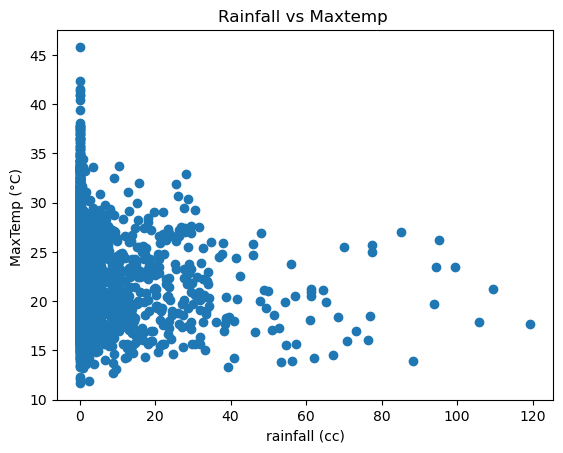

In [9]:
 import matplotlib.pyplot as plt
plt.scatter(df['Rainfall'],df['MaxTemp'])
plt.xlabel('rainfall (cc)')
plt.ylabel('MaxTemp (°C) ')
plt.title('Rainfall vs Maxtemp ')
plt.show()


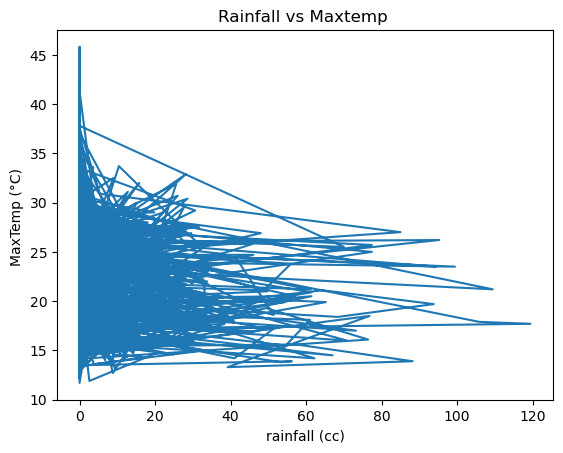

In [10]:
import matplotlib.pyplot as plt
plt.plot(df['Rainfall'],df['MaxTemp'])
plt.xlabel('rainfall (cc)')
plt.ylabel('MaxTemp (°C) ')
plt.title('Rainfall vs Maxtemp ')
plt.show()

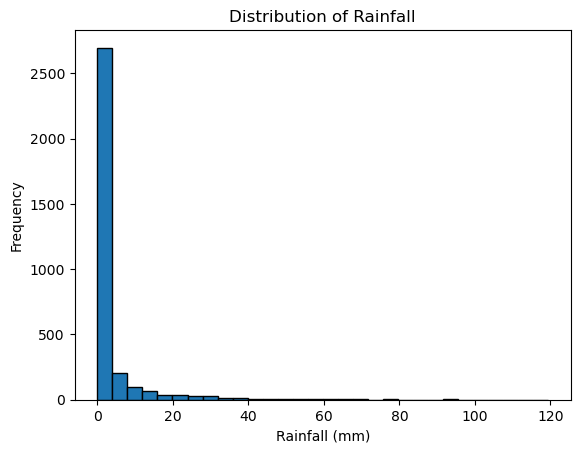

In [11]:
plt.hist(df['Rainfall'], bins=30, edgecolor='k')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Frequency')
plt.title('Distribution of Rainfall')
plt.show()

In [29]:
df_sydney_processed.replace(['No', 'Yes'], [0,1], inplace=True)

In [30]:
df_sydney_processed.drop('Date',axis=1,inplace=True)

In [31]:
df_sydney_processed = df_sydney_processed.astype(float)

In [32]:
features = df_sydney_processed.drop(columns='RainTomorrow', axis=1)
Y = df_sydney_processed['RainTomorrow']

In [33]:
x_train, x_test, y_train, y_test = train_test_split(features, Y, test_size=0.2, random_state=10)

In [34]:
LinearReg = LinearRegression()
LinearReg.fit(x_train, y_train)

LinearRegression()

In [35]:
predictions = LinearReg.predict(x_test)

In [36]:
LinearRegression_MAE = mean_absolute_error(y_test, predictions)
LinearRegression_MSE = mean_squared_error(y_test, predictions)
LinearRegression_R2 = r2_score(y_test, predictions)

In [37]:
Report = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'R2'],
    'Value': [LinearRegression_MAE, LinearRegression_MSE, LinearRegression_R2]
})
print(Report)

  Metric     Value
0    MAE  0.256316
1    MSE  0.115723
2     R2  0.427121


In [38]:
KNN = KNeighborsClassifier(n_neighbors=4)
KNN.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [39]:
predictions = KNN.predict(x_test)

In [40]:
KNN_Accuracy_Score = accuracy_score(y_test, predictions)
KNN_JaccardIndex = jaccard_score(y_test, predictions, average='binary')  
KNN_F1_Score = f1_score(y_test, predictions, average='binary')  

In [41]:
Tree = DecisionTreeClassifier()
Tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [42]:
predictions = Tree.predict(x_test)

In [43]:
Tree_Accuracy_Score = accuracy_score(y_test, predictions)
Tree_JaccardIndex = jaccard_score(y_test, predictions, average='binary')  
Tree_F1_Score = f1_score(y_test, predictions, average='binary')  

In [44]:
x_train, x_test, y_train, y_test = train_test_split(features, Y, test_size=0.2, random_state=1)

In [45]:
LR = LogisticRegression(solver='liblinear')
LR.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

In [46]:
predictions = LR.predict(x_test)

In [47]:
predict_proba = LR.predict_proba(x_test)

In [48]:
LR_Accuracy_Score = accuracy_score(y_test, predictions)
LR_JaccardIndex = jaccard_score(y_test, predictions, average='binary')  
LR_F1_Score = f1_score(y_test, predictions, average='binary')  
LR_Log_Loss = log_loss(y_test, predict_proba)

In [49]:
SVM = SVC()
SVM.fit(x_train, y_train)

SVC()

In [50]:
predictions = SVM.predict(x_test)

In [51]:
SVM_Accuracy_Score = accuracy_score(y_test, predictions)
SVM_JaccardIndex = jaccard_score(y_test, predictions, average='binary')  
SVM_F1_Score = f1_score(y_test, predictions, average='binary')  

In [52]:
Report = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'Decision Tree', 'SVM'],
    'Accuracy': [LR_Accuracy_Score, KNN_Accuracy_Score, Tree_Accuracy_Score, SVM_Accuracy_Score],
    'Jaccard': [LR_JaccardIndex, KNN_JaccardIndex, Tree_JaccardIndex, SVM_JaccardIndex],
    'F1-Score': [LR_F1_Score, KNN_F1_Score, Tree_F1_Score, SVM_F1_Score],
    'LogLoss': [LR_Log_Loss, 'N/A', 'N/A', 'N/A']
})
print(Report)

                 Model  Accuracy   Jaccard  F1-Score   LogLoss
0  Logistic Regression  0.836641  0.509174  0.674772  0.380548
1                  KNN  0.818321  0.425121  0.596610       N/A
2        Decision Tree  0.754198  0.403704  0.575198       N/A
3                  SVM  0.722137  0.000000  0.000000       N/A
